# Clustering of Countries Assignment

## Data description

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

- After the recent funding programmes, they have been able to raise around 10 million dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

- And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.


_Our main task is to cluster the countries by the factors mentioned above and then present solution and recommendations to the CEO_

Lets divide the entire process of clustering into steps:

- Step 1: Reading and understanding data
- Step 2: Exploratory Data analysis
>- a) Data cleaning
>- b) univariate Analysis
>- c) Bivariate Analysis
- Step 3: Outlier Treatment
- Step 4: Scaling data and Hopkins test
- Step 5: Creating k-means clustering algorithm and visualising clusters formed
- Step 6: Creating Hierarchical algorithm and visualising clusters formed
- Step 7: Reporting 5 or more backward countries

## Step 1: Reading and understanding data

In [7]:
# importing necessary libraries and warnings

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [8]:
# Reading the dataset
data= pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
# Checking shape
data.shape

(167, 10)

In [10]:
# Describing data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
# checking data types
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Step 2: Exploratory Data analysis

### a) Data cleaning

In [13]:
# Convert exports, imports and health spending percentages tpo absolute values
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [14]:
# Checking null values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Since there are no null values proceeding to further step

### b) Univariate analysis

In [15]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

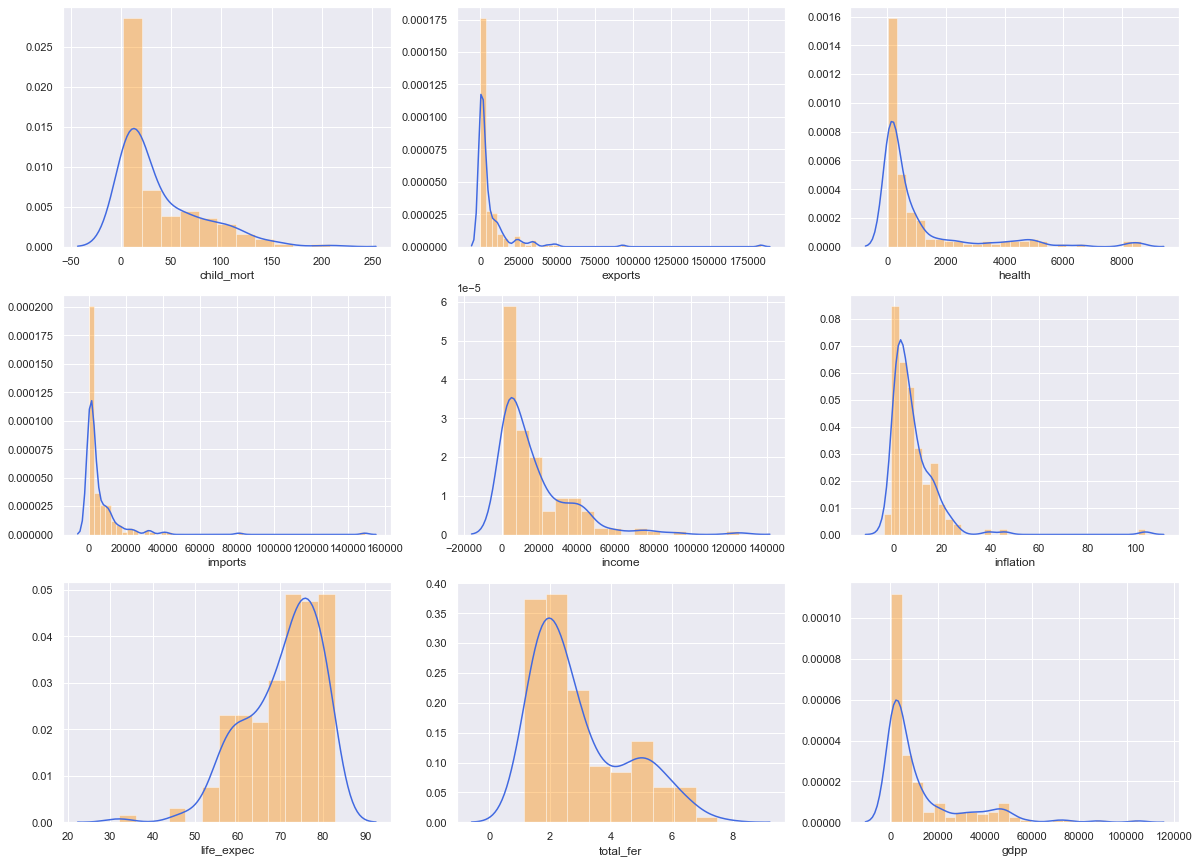

In [16]:
# Plotting histogram for each numerical column
plt.figure(figsize=[20,15])
for i in enumerate(data.describe().columns):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]], color='darkorange',kde_kws={'color':'royalblue'})
plt.show()

___Inferences___:

1. > From the above plot, most of the average income per person and gdp per capita is observed in the range of 0-15000
2. > On average, we can infer that life expectancy of a person for most of the countries is observed between 60-80
3. > Child mortality (Death of children under 5 years of age per 1000 live births) seems to be below 50 in most of the countries, only few countries child mortality is above 100.


### c) Bivariate Analysis

In [17]:
# sorting gdp value for each country
gdp = data.sort_values(by = ['gdpp'], ascending=True)
gdp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
44,Denmark,4.1,29290.0000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000
123,Qatar,9.0,43796.9000,1272.4300,16731.400,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,47744.0000,8579.0000,39761.800,55500,0.317,82.2,1.52,74600
114,Norway,3.2,34856.6000,8323.4400,25023.000,62300,5.950,81.0,1.95,87800


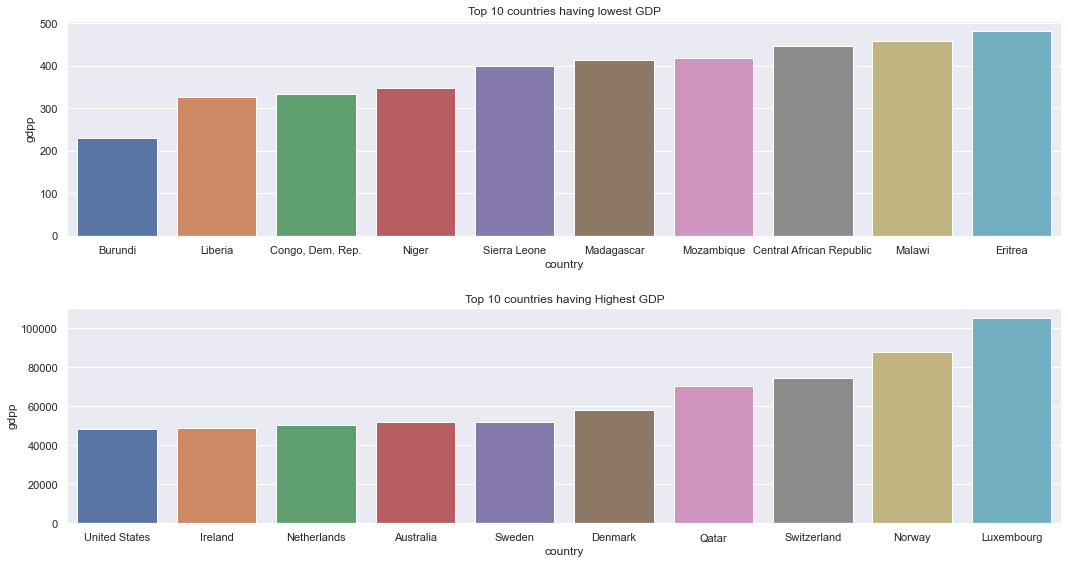

In [18]:
# plotting top 10 countries with highest and lowest gdp
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
sns.barplot(gdp.country.head(10), gdp.gdpp.head(10))
plt.title("Top 10 countries having lowest GDP")
plt.subplot(2,1,2)
sns.barplot(gdp.country.tail(10), gdp.gdpp.tail(10))
plt.title("\nTop 10 countries having Highest GDP")
plt.tight_layout()
plt.show()

___Inferences___:

1. > From the above plot, we can see that top 5 countries having lowest GDP are ___Burundi, Liberia, Congo, Dem. Rep., Niger and Sierra Leone.___
2. > Top 5 countries having highest GDP are ___Luxembourg, Norway, Switzerland, Qatar and Denmark.___

In [19]:
# sorting net income per person for each country
income = data.sort_values(by = ['income'], ascending=True)
income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
...,...,...,...,...,...,...,...,...,...,...
133,Singapore,2.8,93200.0000,1845.3600,81084.000,72100,-0.046,82.7,1.15,46600
82,Kuwait,10.8,25679.5000,1012.5500,11704.000,75200,11.200,78.2,2.21,38500
23,Brunei,10.5,23792.2000,1002.5200,9884.000,80600,16.700,77.1,1.84,35300
91,Luxembourg,2.8,183750.0000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000


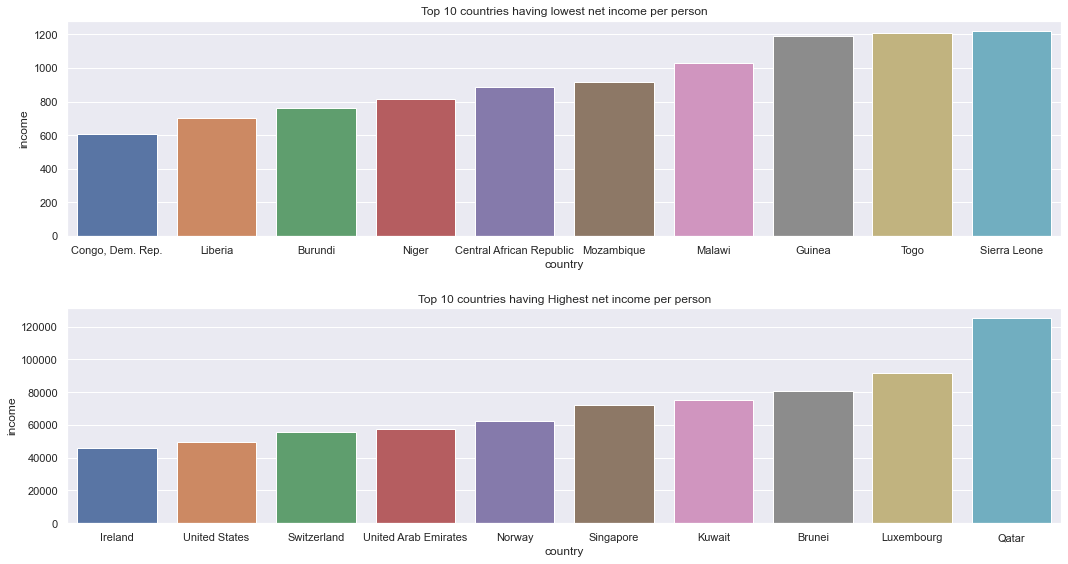

In [20]:
#plotting top 10 countries with highest and lowest income
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
sns.barplot(income.country.head(10), income.income.head(10))
plt.title("Top 10 countries having lowest net income per person")
plt.subplot(2,1,2)
sns.barplot(income.country.tail(10), income.income.tail(10))
plt.title("\nTop 10 countries having Highest net income per person")
plt.tight_layout()
plt.show()

___Inferences___:

1. > From the above plot, we can see that top 5 countries having lowest net income per person are ___Congo, Dem. Rep.,Liberia,Burundi Niger and Central African Republic___
2. > Top 5 countries having highest net income per person are ___Qatar, Luxembourg, Brunei, Kuwait and Singapore.___

In [21]:
# sorting health for each country
health = data.sort_values(by = ['health'], ascending=True)
health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.600,61.7,4.61,482
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.790,60.8,4.60,413
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.550,58.8,7.49,348
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.040,66.8,2.41,988
...,...,...,...,...,...,...,...,...,...,...
44,Denmark,4.1,29290.00000,6612.0000,25288.000000,44000,3.220,79.5,1.87,58000
91,Luxembourg,2.8,183750.00000,8158.5000,149100.000000,91700,3.620,81.3,1.63,105000
114,Norway,3.2,34856.60000,8323.4400,25023.000000,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,47744.00000,8579.0000,39761.800000,55500,0.317,82.2,1.52,74600


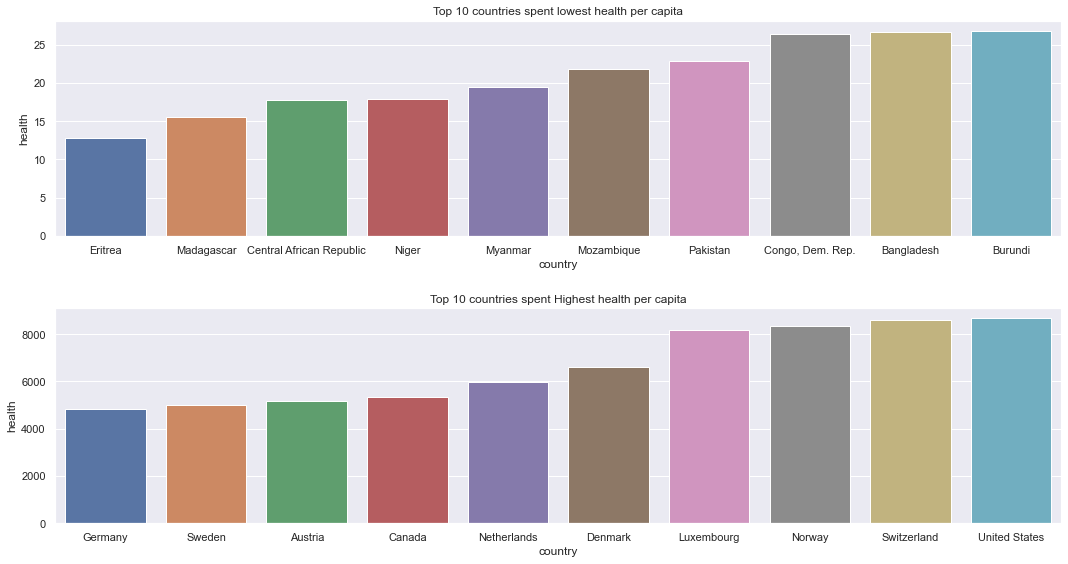

In [22]:
#plotting top 10 countries spent lowest and highest health per capita
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
sns.barplot(health.country.head(10), health.health.head(10))
plt.title("Top 10 countries spent lowest health per capita")
plt.subplot(2,1,2)
sns.barplot(health.country.tail(10), health.health.tail(10))
plt.title("\nTop 10 countries spent Highest health per capita")
plt.tight_layout()
plt.show()

___Inferences___:

1. > From the above plot, we can see that top 5 countries spent lowest health per capita are ___Eritrea, Madagascar,	Central African Republic, Niger and Myanmar___
2. > Top 5 countries spent highest health per capita are ___United States, Switzerland, Norway, Luxembourg and Denmark.___

In [23]:
# sorting child mortality for each country below 5 years per 1000 live births
child = data.sort_values(by = ['child_mort'], ascending=False)
child

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,17879.400,4134.9000,17278.800,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,24070.200,5017.2300,21204.700,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,93200.000,1845.3600,81084.000,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000


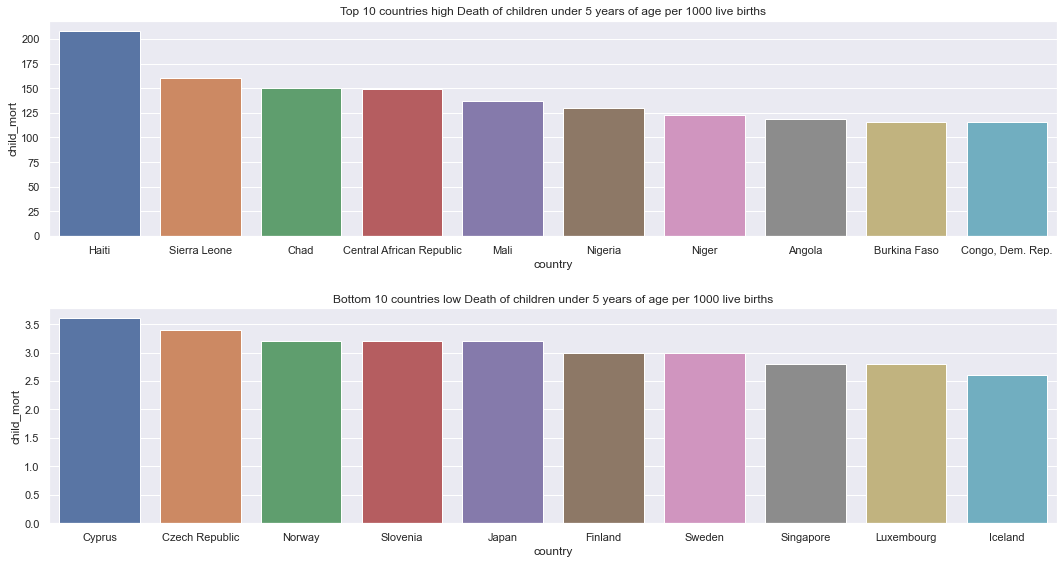

In [24]:
#plotting top 10 countries with highest and lowest child mortality
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
sns.barplot(child.country.head(10), child.child_mort.head(10))
plt.title("Top 10 countries high Death of children under 5 years of age per 1000 live births")
plt.subplot(2,1,2)
sns.barplot(child.country.tail(10), child.child_mort.tail(10))
plt.title("\nBottom 10 countries low Death of children under 5 years of age per 1000 live births") 
plt.tight_layout()
plt.show()

___Inferences___:

1. > From the above plot, we can see that top 5 countries with lowest child mortality are ___Iceland, Luxembourg, Singapore, Sweden and Finland___
2. > Top 5 countries with highest child mortality are ___Haiti, Sierra Leone, Chad, Central African Republic and Mali.___

In [25]:
# sorting life expectency for each country
life = data.sort_values(by = ['life_expec'], ascending=False)
life

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,6675.000,4223.0500,6052.000,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,93200.000,1845.3600,81084.000,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.000,8579.0000,39761.800,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,22374.600,3938.6000,18142.700,38800,5.470,82.0,2.20,41900
7,Australia,4.8,10276.200,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
...,...,...,...,...,...,...,...,...,...,...
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.100,53.1,5.31,459
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.000,52.0,5.40,1460
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.150,46.5,3.30,1170


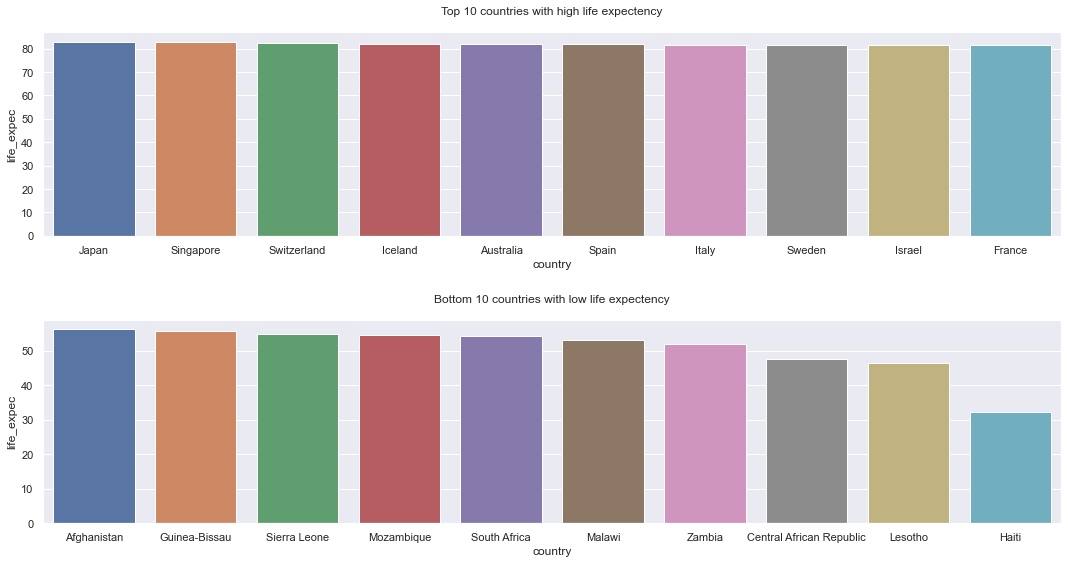

In [26]:
#plotting top 10 countries with highest and lowest life_expec
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
sns.barplot(life.country.head(10), life.life_expec.head(10))
plt.title("Top 10 countries with high life expectency\n")
plt.subplot(2,1,2)
sns.barplot(life.country.tail(10), life.life_expec.tail(10))
plt.title("\nBottom 10 countries with low life expectency\n") 
plt.tight_layout()
plt.show()

___Inferences___:

1. > From the above plot, we can see that top 10 countries have the same life expectancy of 80-82 years approximately. 
2. > Top 5 countries with lowest life expectancy are ___Haiti, Lesotho, Central African Republic,Zambia and Malawi.___

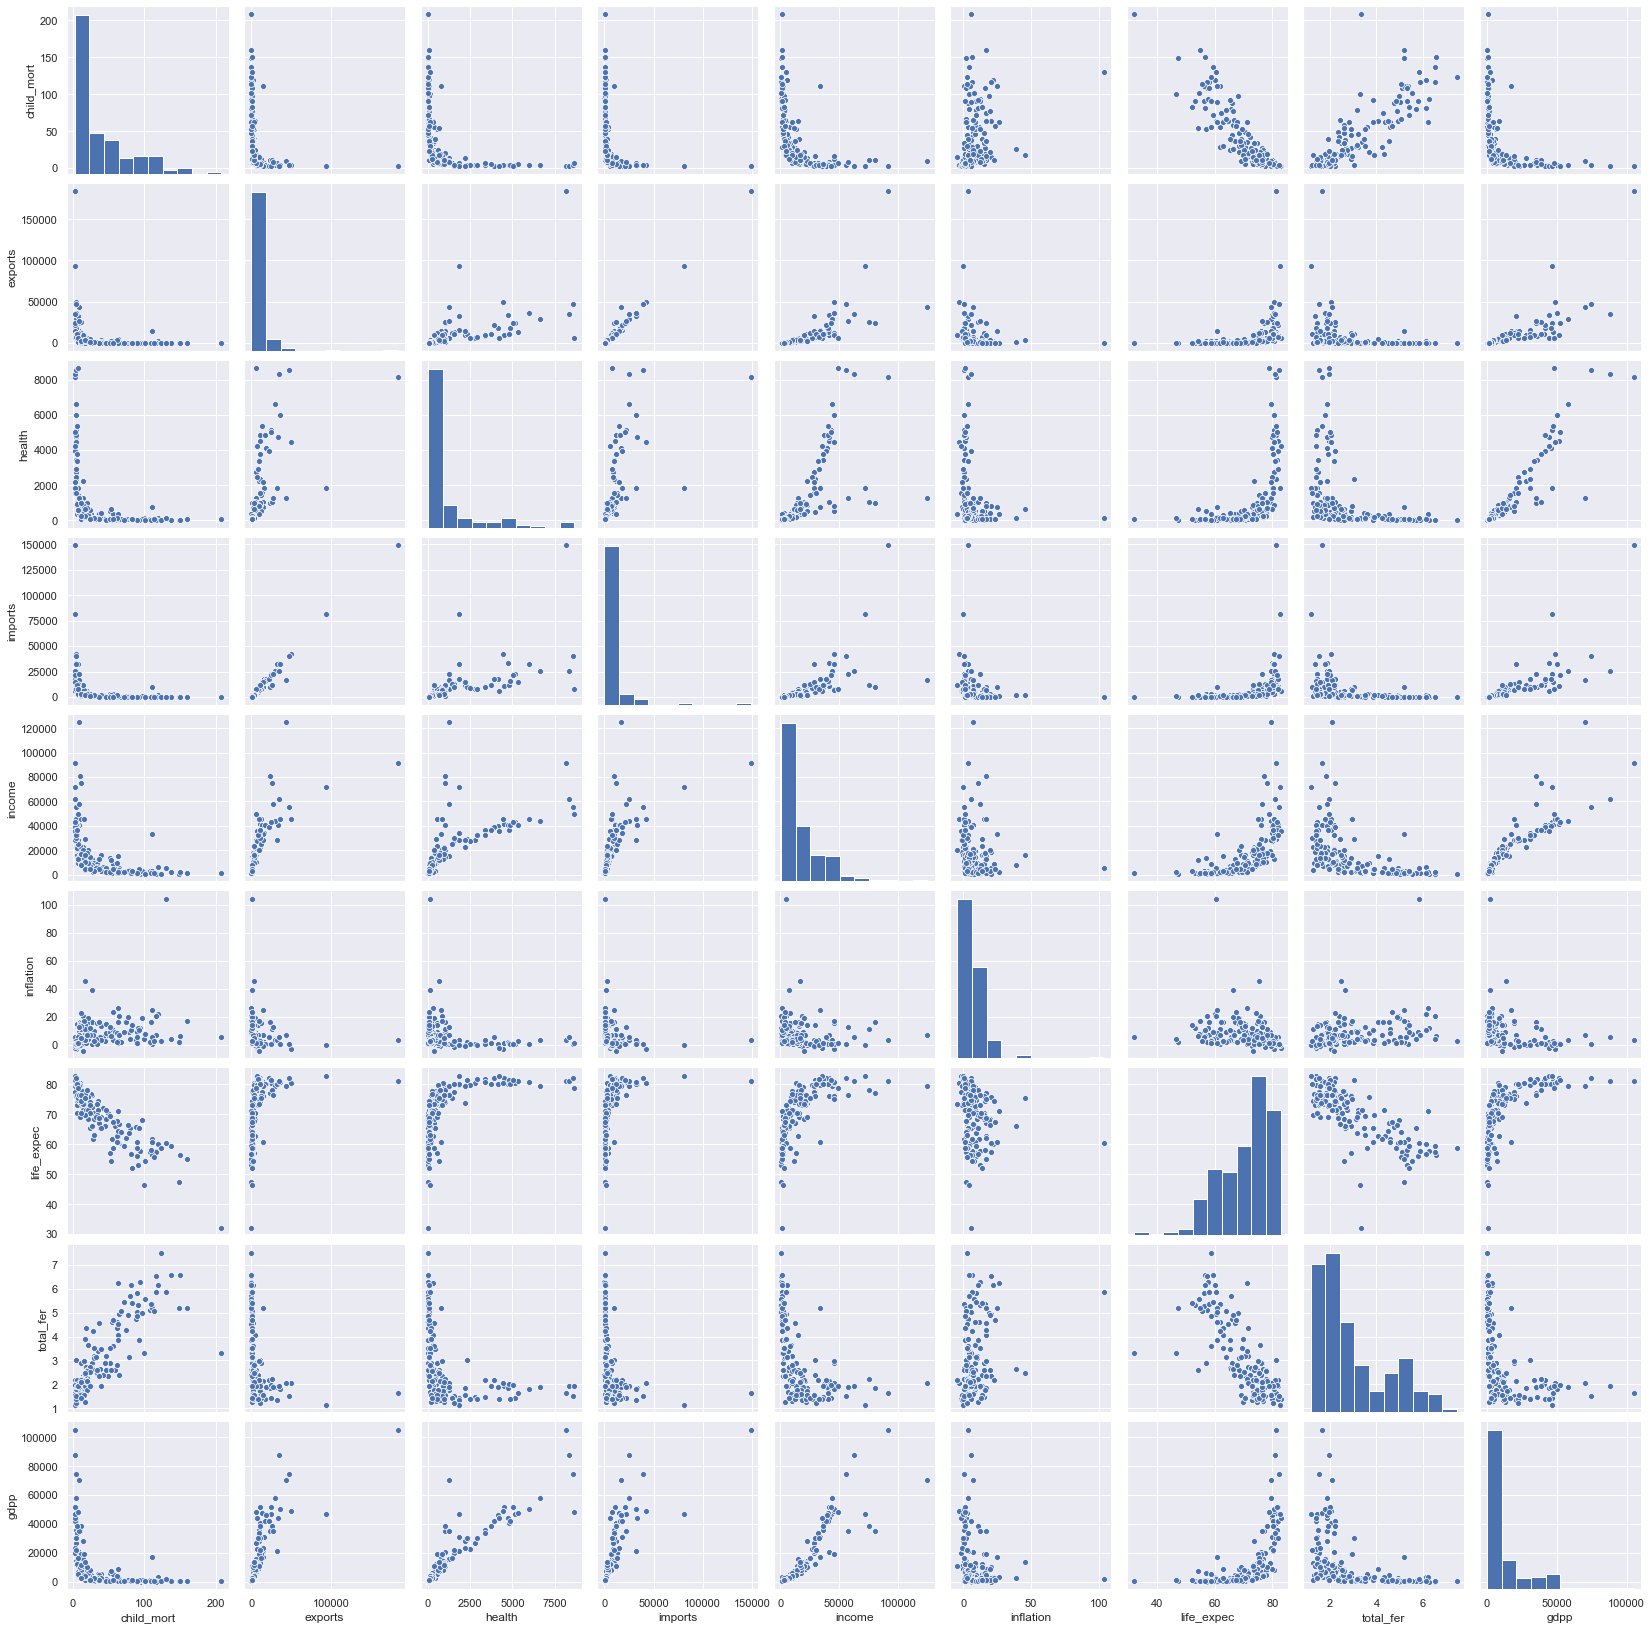

In [27]:
# Pair plot for all numerical variables
sns.pairplot(data)
plt.show()

In [28]:
# checking correlation for the data
correlation = data.corr()
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


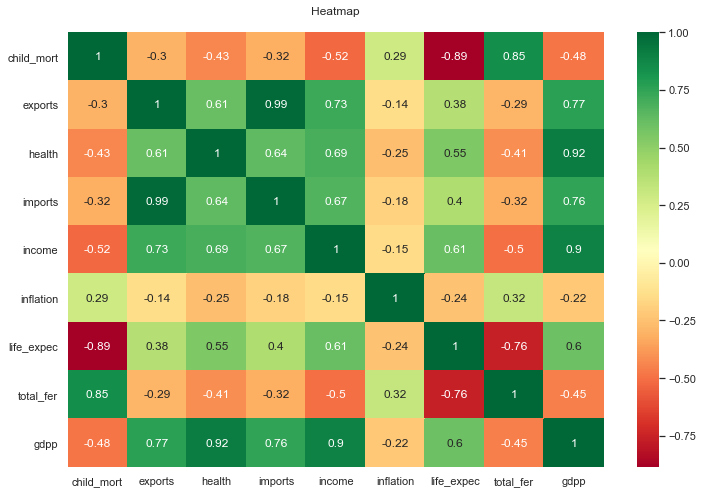

In [29]:
# Heapmat for given data
plt.figure(figsize=[12,8])
sns.heatmap(correlation, annot=True, cmap='RdYlGn')
plt.title('Heatmap\n')
plt.show()

**Inferences:**
> 1. From the above plot, we can infer that there is a high correlation between income and GDP, so, if average net income per person increases the GDP of the country will also increase.
> 2. If child mortality(Death of children under 5 years of age per 1000 live births) decreases the life expectancy will also decreases.
> 3. If you spend more on Health , then the child mortality will reduce and it will increase the GDP rate.

In [30]:
# Resetting index before outlier treatment
data.reset_index()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


## Step 3: Outlier Treatment

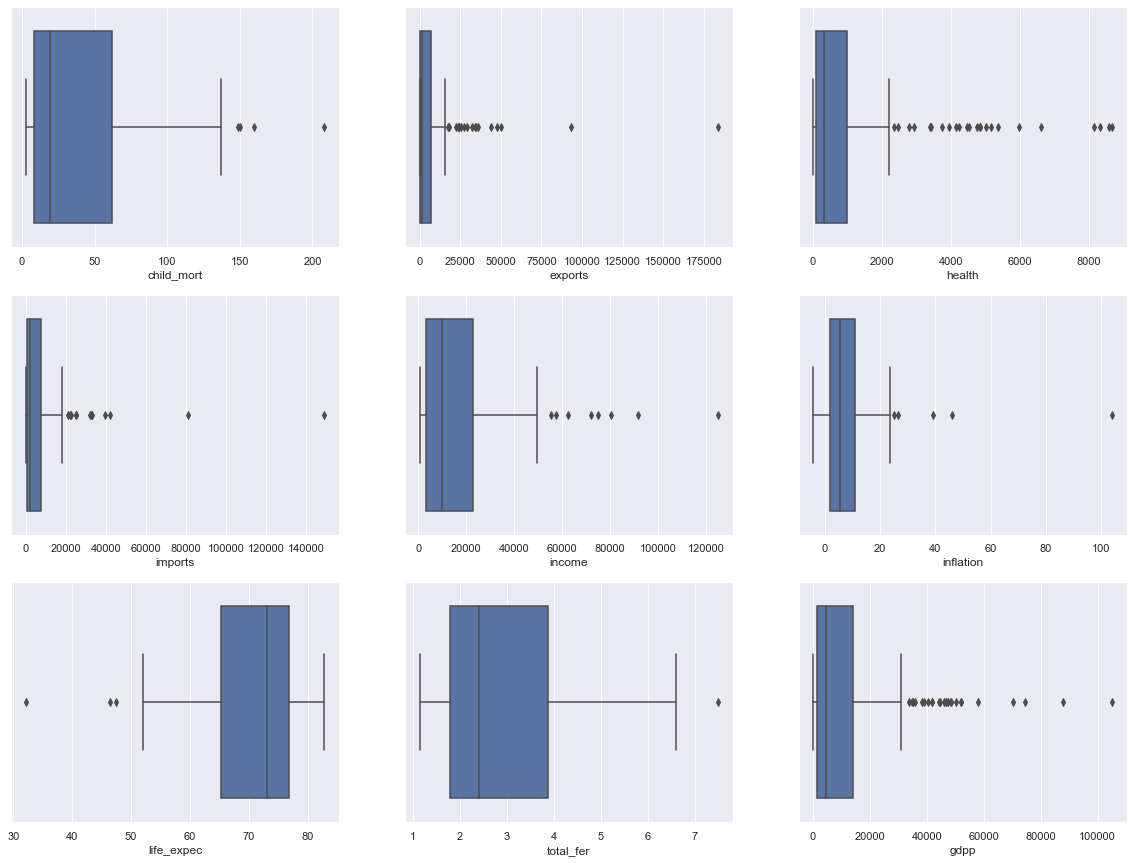

In [31]:
# checking outliers using boxplot for each numerical column before outlier treatment
plt.figure(figsize=[20,15])
for i in enumerate(data.describe().columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])

plt.show()

1. > Removing the lower range outliers for countries with low child mortality, low inflation and low total fertility. 
2. > Removing the upper range outliers for countries with high income, GDP, imports, exports, life_expectancy and health.
3. > Here, we are using soft capping method for removing these outliers with quantiles of 0.05 for lower range and 0.95 for higher range

In [32]:
# Removing the lower range outliers for countries with low child mortality, low inflation and low total fertility
low_range = ['child_mort','inflation','total_fer']
for column in low_range:
    Q1 = data[column].quantile(0.05)
    data = data[(data[column]>= Q1)]

In [33]:
# Removing the upper range outliers for countries with high income, GDP, imports, exports, life_expectancy and health
high_range = ['exports', 'health', 'imports','income','gdpp','life_expec']
for column in high_range:
    Q3 = data[column].quantile(0.95)
    data = data[(data[column] <= Q3)]

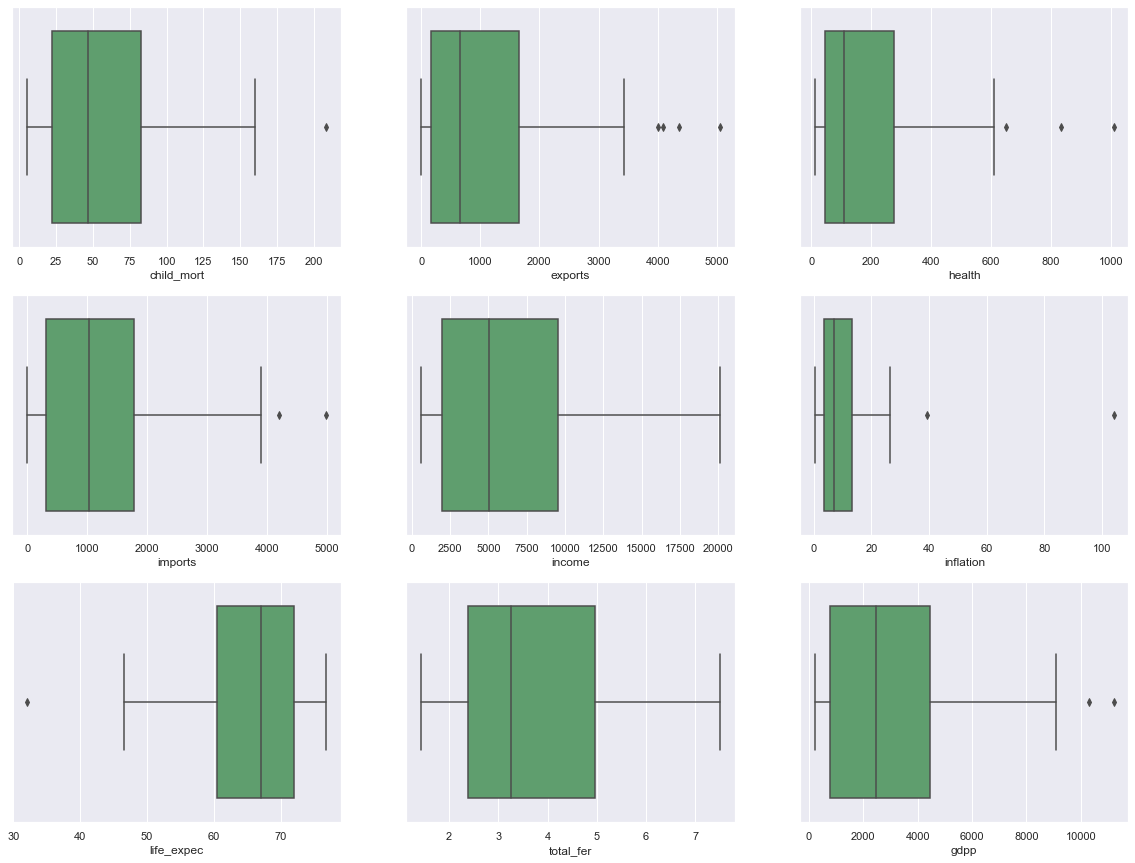

In [34]:
# plotting boxplot again after outlier treatment
plt.figure(figsize=[20,15])
for i in enumerate(data.describe().columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]], color='g')
plt.show()

In [35]:
# Checking shape after outlier treatment
data.shape

(102, 10)

## Step 4: Scaling data and Hopkins test

In [36]:
# creating data with only numerical columns
clusterdata = data.iloc[:,1:]
clusterdata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


In [37]:
# Scaling data
scaler = StandardScaler()

cluster_scaled = scaler.fit_transform(clusterdata)
cluster_scaled.shape

(102, 9)

In [38]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [39]:
# Creating dataframe with scaled data and assigning column names
cluster_scaled = pd.DataFrame(cluster_scaled)
cluster_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
                          'inflation', 'life_expec', 'total_fer', 'gdpp']
cluster_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.823107,-0.902397,-0.752848,-0.903081,-0.938084,-0.029333,-1.216367,1.439172,-0.940105
1,-0.978891,0.068511,0.459035,0.674824,0.721648,-0.453619,1.321072,-1.293829,0.443747
2,-0.716915,0.573999,0.019748,0.142065,1.314125,0.541525,1.346320,-0.481138,0.588509
3,1.528237,1.007429,-0.438115,0.245415,-0.082284,1.081526,-0.724028,1.662007,0.224647
4,-1.030306,0.782505,3.496578,0.366635,2.471150,0.952955,1.257952,-0.821944,2.873409


### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [40]:
# Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
# checking Hopkins values
Hopkins = []
for i in range(5):
    Hopkins.append(hopkins(cluster_scaled))

In [42]:
# Taking average hopkins value
sum(Hopkins)/len(Hopkins)

0.8191878879713531

Since the value is 0.83 there is a high tendency to cluster this data

## Step 5: Creating k-means clustering algorithm and visualising clusters formed

### Finding the Optimal Number of Clusters

#### SSD (Elbow curve method)

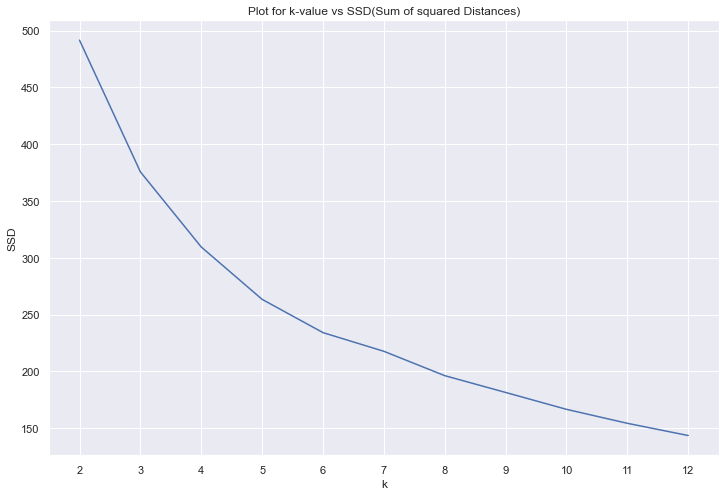

In [43]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=[12,8])
plt.plot(range_n_clusters,ssd)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12])
plt.title("Plot for k-value vs SSD(Sum of squared Distances)")
plt.xlabel('k')
plt.ylabel('SSD')
plt.show()

From the above plot we can clearly see that elbow has been formed at ___k = 3___

Further, lets proceed with Silhouette Analysis

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [44]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.40658955454784557
For n_clusters=3, the silhouette score is 0.33996694306863734
For n_clusters=4, the silhouette score is 0.35634127956386136
For n_clusters=5, the silhouette score is 0.27773739947935955
For n_clusters=6, the silhouette score is 0.2208930941772074
For n_clusters=7, the silhouette score is 0.23836266406118625
For n_clusters=8, the silhouette score is 0.24358206846506028
For n_clusters=9, the silhouette score is 0.23396011087456223
For n_clusters=10, the silhouette score is 0.24392121240654804
For n_clusters=11, the silhouette score is 0.2238628956497137
For n_clusters=12, the silhouette score is 0.21130790086732587


From the above scores, we can see that for n=2 seems to be higher, however, with 2 clusters we are won't be able to extract the backward countries and lets proceed further by taking k = 3 as number of clusters

In [45]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state= 100)
kmeans.fit(cluster_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [81]:
# Labels formed by k-means
kmeans.labels_

array([1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1])

In [47]:
# Assigning labels to main data formed by k-means
data['K_means_labels'] = kmeans.labels_

In [48]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


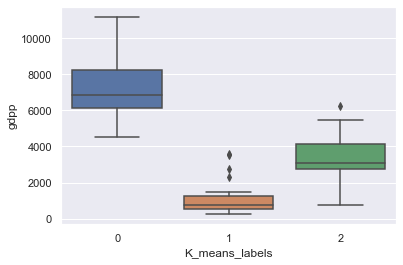

In [82]:
# plotting box plots with gdpp  and k-means cluster labels
sns.boxplot(x = 'K_means_labels', y = 'gdpp', data= data)
plt.show()

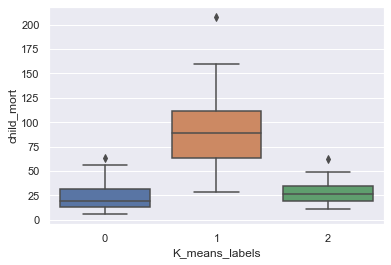

In [83]:
# plotting box plots with child_mort
sns.boxplot(x = 'K_means_labels', y = 'child_mort', data= data)
plt.show()

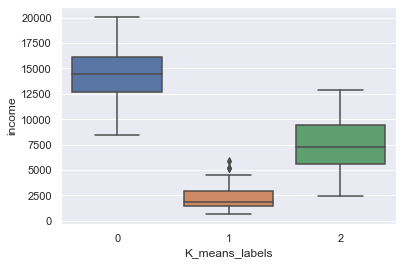

In [51]:
# plotting box plots with income
sns.boxplot(x = 'K_means_labels', y = 'income', data= data)
plt.show()

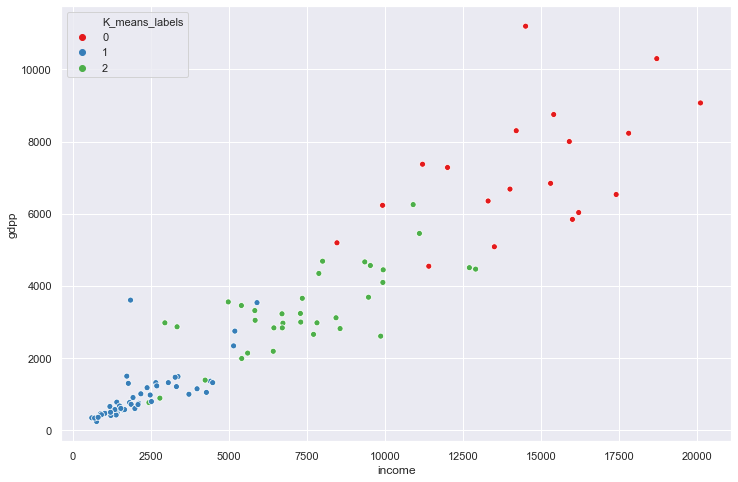

In [52]:
# scatter plot for income vs gdpp with cluster labels formed 

plt.figure(figsize=[12,8])
sns.scatterplot(data.income, data.gdpp,hue = data.K_means_labels, palette='Set1')
plt.show()

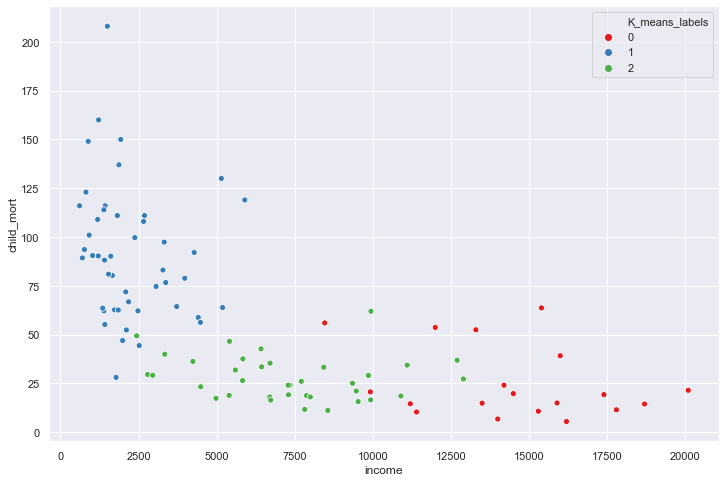

In [53]:
# scatter plot for income vs child_mort with cluster labels formed 

plt.figure(figsize=[12,8])
sns.scatterplot(data.income, data.child_mort,hue = data.K_means_labels, palette='Set1')
plt.show()

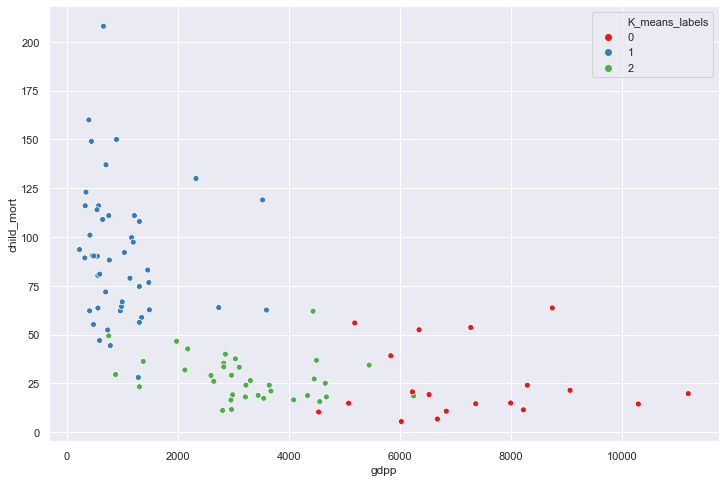

In [54]:
# scatter plot for gdpp vs child_mort with cluster labels formed 

plt.figure(figsize=[12,8])
sns.scatterplot(data.gdpp, data.child_mort,hue = data.K_means_labels, palette='Set1')
plt.show()

__Finally we can see that using, k-means clustering method, clusters have been formed as__

1. > label = 0, high income, high GDP and low child mortality
2. > label = 1, low income, low GDP and high child mortality
3. > label = 2, moderate income, moderate GDP and low child mortality 

Inorder to suggest the backward countries, we should focus on data where ___cluster label = 1___

Lets proceed further to check Hierarchical clustering

## Step 6: Creating Hierarchical algorithm and visualising clusters formed

### Single linkage

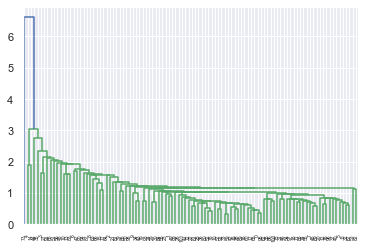

In [55]:
# Hierarchical clustering with single linkage
mergings = linkage(cluster_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [56]:
# creating 3 clusters using cut_tree method
cluster_labels_single = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
data['Hierachical_single'] = cluster_labels_single

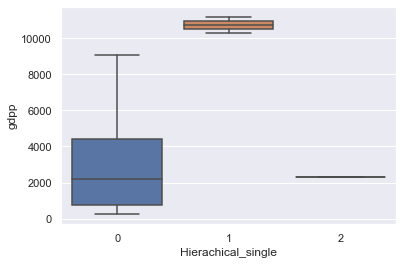

In [58]:
# plotting box plots with gdpp
sns.boxplot(x = 'Hierachical_single', y = 'gdpp', data= data)
plt.show()

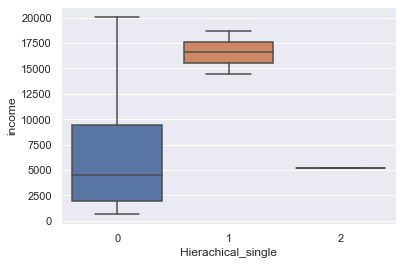

In [59]:
# plotting box plots with income
sns.boxplot(x = 'Hierachical_single', y = 'income', data= data)
plt.show()

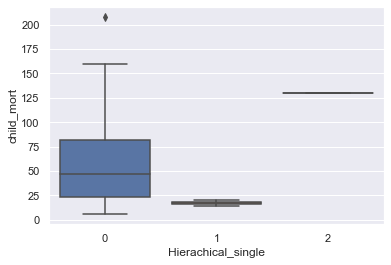

In [60]:
# plotting box plots with childmort
sns.boxplot(x = 'Hierachical_single', y = 'child_mort', data= data)
plt.show()

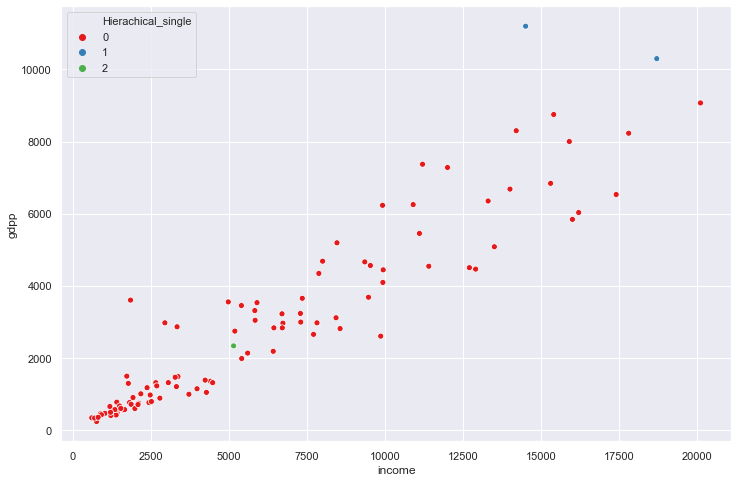

In [61]:
# scatter plot for income vs gdpp with cluster labels formed 
plt.figure(figsize=[12,8])
sns.scatterplot(data.income, data.gdpp,hue = data['Hierachical_single'], palette='Set1')
plt.show()

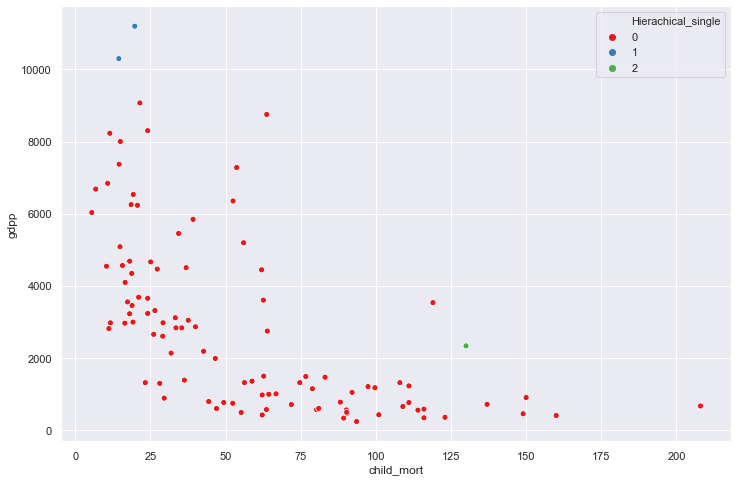

In [62]:
# scatter plot for child_mort vs gdpp with cluster labels formed
plt.figure(figsize=[12,8])
sns.scatterplot(data.child_mort, data.gdpp,hue = data['Hierachical_single'], palette='Set1')
plt.show()

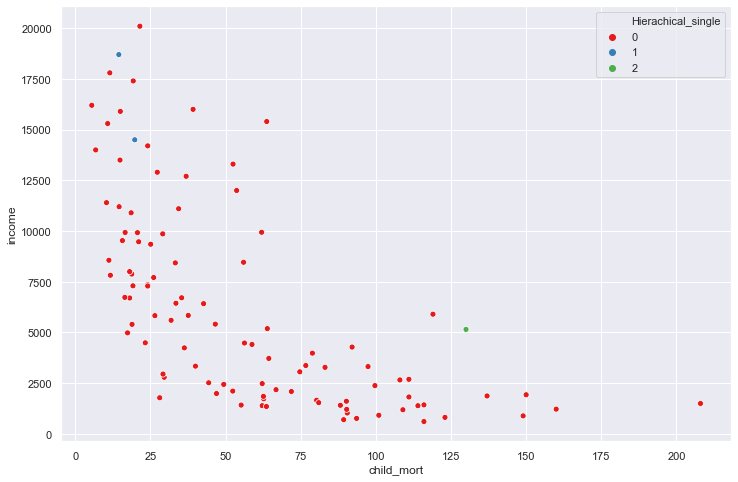

In [63]:
# scatter plot for child_mort vs income with cluster labels formed 
plt.figure(figsize=[12,8])
sns.scatterplot(data.child_mort, data.income,hue = data['Hierachical_single'], palette='Set1')
plt.show()

We can see that single linkage clustering is not promising since most of the data points are clustered in single cluster label and only few data points are in remaining clusters. Lets proceed further to check the complete linkage

### Complete linkage

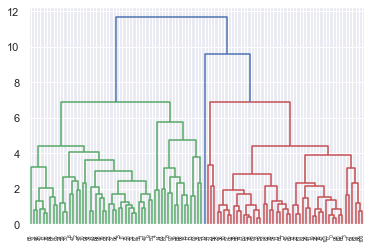

In [64]:
# Hierarchical clustering with complete linkage
mergings = linkage(cluster_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [65]:
# creating 3 clusters using cut_tree method
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [66]:
# Assigning cluster labels to the main data
data['Hierarchical_complete'] = cluster_labels

In [67]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_labels,Hierachical_single,Hierarchical_complete
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,2,0,1
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,2,0,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,2,0,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,1,0,0


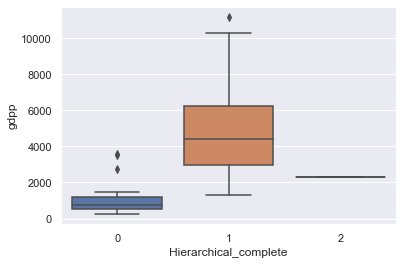

In [68]:
# plotting box plots with gdpp
sns.boxplot(x = 'Hierarchical_complete', y = 'gdpp', data= data)
plt.show()

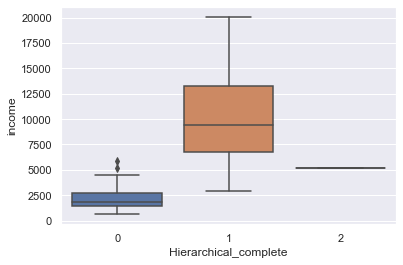

In [69]:
# plotting box plots with income
sns.boxplot(x = 'Hierarchical_complete', y = 'income', data= data)
plt.show()

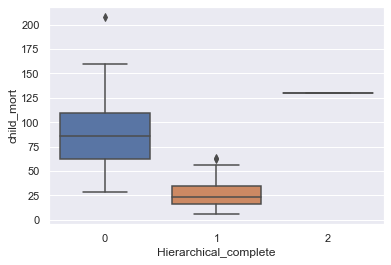

In [70]:
# plotting box plots with child_mort
sns.boxplot(x = 'Hierarchical_complete', y = 'child_mort', data= data)
plt.show()

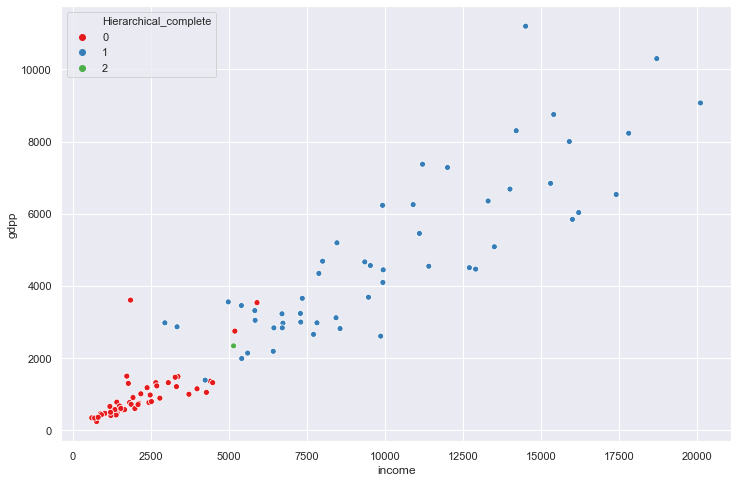

In [71]:
# scatter plot for income vs gdpp with cluster labels formed 
plt.figure(figsize=[12,8])
sns.scatterplot(data.income, data.gdpp,hue = data.Hierarchical_complete, palette='Set1')
plt.show()

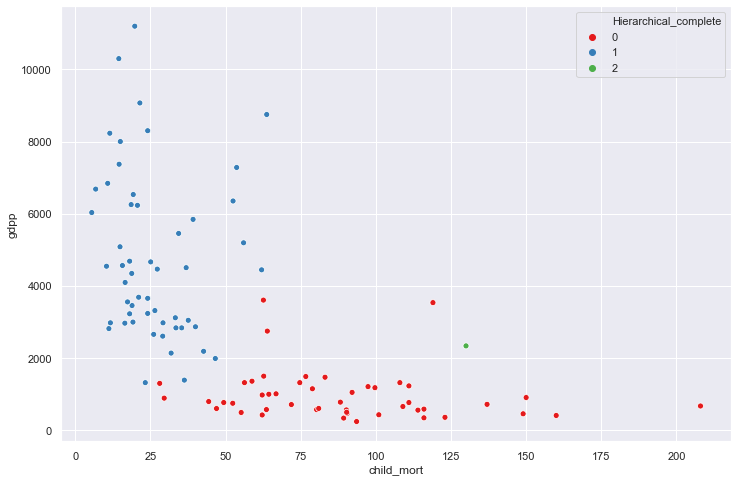

In [72]:
# scatter plot for child_mort vs gdpp with cluster labels formed
plt.figure(figsize=[12,8])
sns.scatterplot(data.child_mort, data.gdpp,hue = data.Hierarchical_complete, palette='Set1')
plt.show()

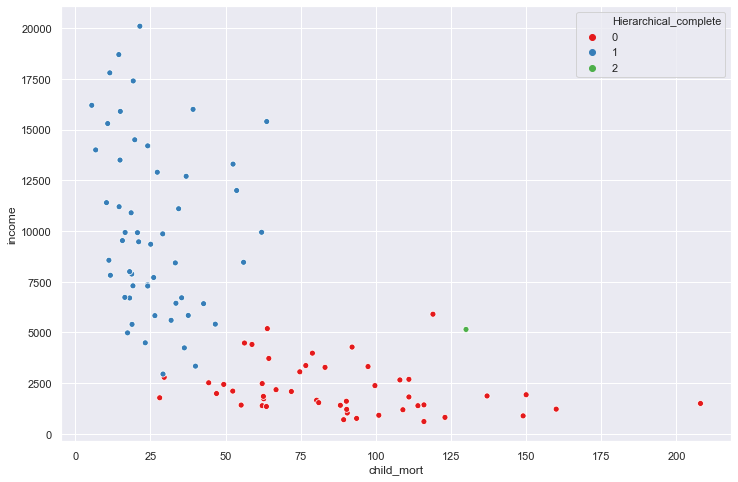

In [73]:
# scatter plot for child_mort vs income with cluster labels formed 
plt.figure(figsize=[12,8])
sns.scatterplot(data.child_mort, data.income,hue = data.Hierarchical_complete, palette='Set1')
plt.show()

__Finally we can see that using, Hierarchical complete linkage clustering method, clusters have been formed as__

1. > label = 0, low income, low GDP and high child mortality
2. > label = 1, high income, high GDP and low child mortality
3. > label = 2, moderate income, moderate GDP and high child mortality 

Inorder to suggest the backward countries, we should focus on data where ___cluster label = 0___

## Step 7: Reporting 5 or more backward countries

In [74]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_labels,Hierachical_single,Hierarchical_complete
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0,1,1


So, we need to check the countries having ___k-means cluster label = 1___ and ____hierarchical cluster label = 0____

In [75]:
# Countries recommended by k-means clustering
data[data['K_means_labels'] == 1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107                     Myanmar
109     

In [76]:
#countries recommended by hierarchical clustering complete linkage
data[data['Hierarchical_complete'] == 0]['country']

0                   Afghanistan
3                        Angola
12                   Bangladesh
17                        Benin
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
83              Kyrgyz Republic
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [77]:
# Checking common countries recommended by k-means and hierarchical clustering
backward_countries = data[(data['K_means_labels'] == 1) & (data['Hierarchical_complete'] == 0)]
backward_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_labels,Hierachical_single,Hierarchical_complete
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553,1,0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530,1,0,0
17,Benin,111.0,180.40400,31.0780,281.976000,1820,0.885,61.8,5.36,758,1,0,0
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575,1,0,0
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231,1,0,0
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,1,0,0
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660,1.910,57.3,5.11,1310,1,0,0
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446,1,0,0
32,Chad,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897,1,0,0
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.870,65.9,4.75,769,1,0,0


In [78]:
backward_countries.shape

(46, 13)

__Now we need to suggest top 10 backward countries with basic amenities and relief during the time of disasters and natural calamities__

In [79]:
# sorting backward countries with gdp, income, child_mort

Top10_backward_countries = backward_countries.sort_values(by=['gdpp','income','child_mort'])[:10]

In [80]:
Top10_backward_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_labels,Hierachical_single,Hierarchical_complete
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,1,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,1,0,0


__Top 10 backward countries:__

>1. Burundi
>2. Liberia
>3. Congo, Dem. Rep.
>4. Niger	
>5. Sierra Leone
>6. Madagascar
>7. Mozambique
>8. Central African Republic	
>9. Malawi
>10. Eritrea
